## Perceptron
#### An algo used for supervised ML and is building block of DL. A mathemetical model which has inputs along with weights and bias we combine them all up then pass it through an activation function to set the result to a specific range. What we do is calculating the most optimal value of W & B, that will help us to do the correct predictions.
#### Perceptron is a binary classifier. The equation for perceptron is like z = w1x1 + w1x2 + b.
#### For 2D - Perceptron acts as a line
#### For 3D - Perceptron acts as a plane
#### for 4D - Perceptron acts as a hyperplane
#### Perceptron works for linear or sort of linear data

### Perceptron From Scratch

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement_linear.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='cgpa', ylabel='resume_score'>

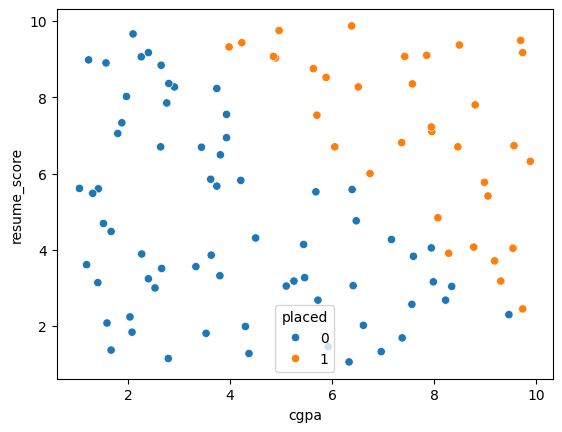

In [ ]:
sns.scatterplot(x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [109]:
df.columns

Index(['cgpa', 'resume_score', 'placed'], dtype='object')

In [110]:
df.shape

(100, 3)

In [111]:
x = df.iloc[:,:2]
y = df.iloc[:,2:]

In [112]:
print("x->",x.columns)
print("y->",y.columns)

x-> Index(['cgpa', 'resume_score'], dtype='object')
y-> Index(['placed'], dtype='object')


In [114]:
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


In [115]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

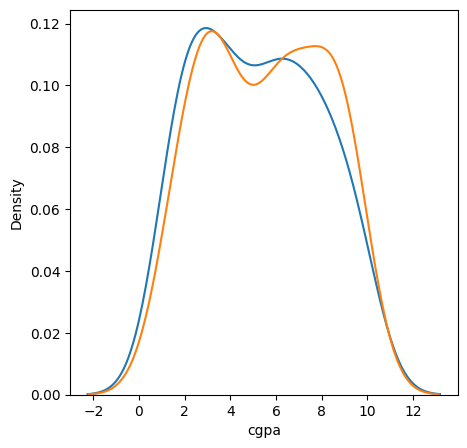

In [43]:
fig, ax1 = plt.subplots(figsize=(5,5))

sns.kdeplot(x_train['cgpa'],ax=ax1)
sns.kdeplot(x_train['resume_score'],ax=ax1)
plt.show()


no need of scaling both are in same range

In [44]:
import numpy as np

In [121]:
class myPerceptron:
  # defining learning rate in constructor
  def __init__(self, lr):
    self.lr = lr

  # Using step funciton as the activation function
  def step(self, z):
    if z>=0.5:
      return 1
    else:
      return 0

  # This is where the perceptron learns
  def fit(self,x,y,epochs):
    x = x.to_numpy()
    y = y.to_numpy()

    # Initializing weights and bias to random values
    self.w = np.random.rand(x.shape[1])
    self.b = 0.0
    for _ in range(epochs):
      for j in range(x.shape[0]):
        # Calculating Z
        z = np.dot(self.w,x[j]) + self.b

        # Applying activation function
        y_hat = self.step(z)

        # Calculating loss
        loss = y[j] - y_hat

        # Updating weights and bias
        self.w += self.lr * loss * x[j]
        self.b += self.lr*loss

  # Here we use the final updated trained weights and bias to predict
  def predict(self,x):
    x = np.array(x)
    y_pred = []
    for i in range(x.shape[0]):
      z = np.dot(self.w,x[i]) + self.b
      y_pred.append(self.step(z))
    return np.array(y_pred)

In [123]:
P = myPerceptron(0.01)

In [134]:
P.fit(x_train,y_train,20)

In [135]:
y_pred = P.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score

In [136]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.95


In [90]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


In [117]:
x_arr = x.to_numpy()
y_arr = y.to_numpy()

In [119]:
y_arr = y_arr.reshape(-1)

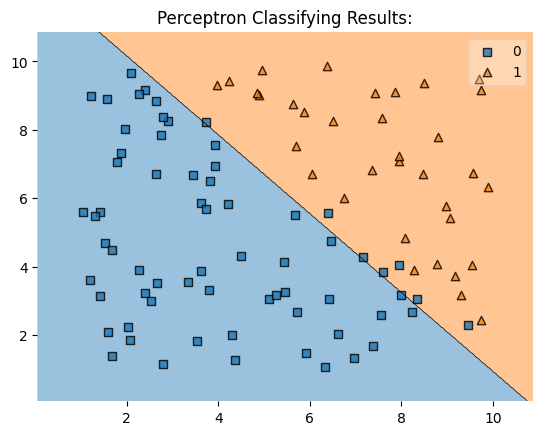

In [137]:
plot_decision_regions(x_arr, y_arr, clf=P)

plt.title("Perceptron Classifying Results:")
plt.show()